<a href="https://colab.research.google.com/github/2walkingfish/Neuromatch_Project_133/blob/master/steinmetz_spikingmatrix_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Steinmetz data

includes some visualizations

In [2]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))


dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


Text(0.5, 1.0, 'Amount of neurons per each animal')

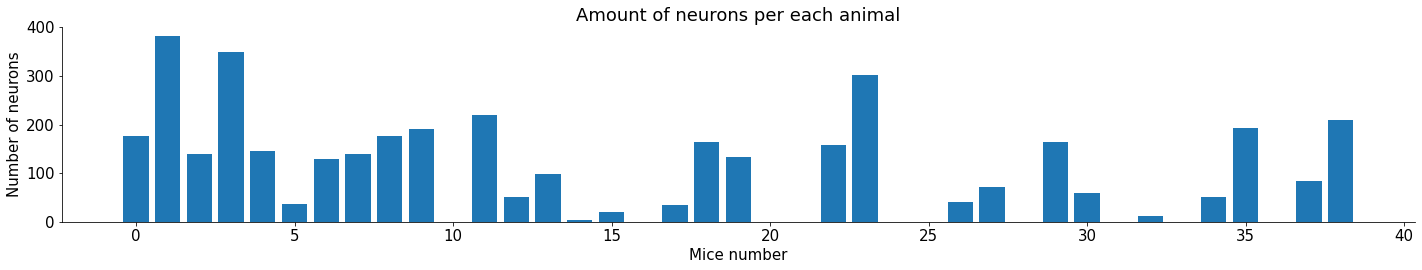

In [5]:

# Pick some brain regions
brain_areas = ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"]

num_neurons_per_mice = []

# Pick some mice
for mouse in range(39):
  # Total number of neurons in those regions
  num_neurons = np.sum([np.sum(alldat[mouse]['brain_area']==brain_area) for brain_area in brain_areas])
  num_neurons_per_mice.append(num_neurons)

plt.figure()
X = np.arange(len(num_neurons_per_mice))
plt.bar(X,num_neurons_per_mice)
plt.xticks()
plt.yticks()
plt.xlabel('Mice number')
plt.ylabel('Number of neurons')
plt.title('Amount of neurons per each animal')

In [6]:
print(dat['spks'].shape[2])

250


Mouse 3
 - 350 neurons [0, 98, 0, 0, 144, 108, 0]
 - 249 trials
Spiking matrix: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
(250, 249)


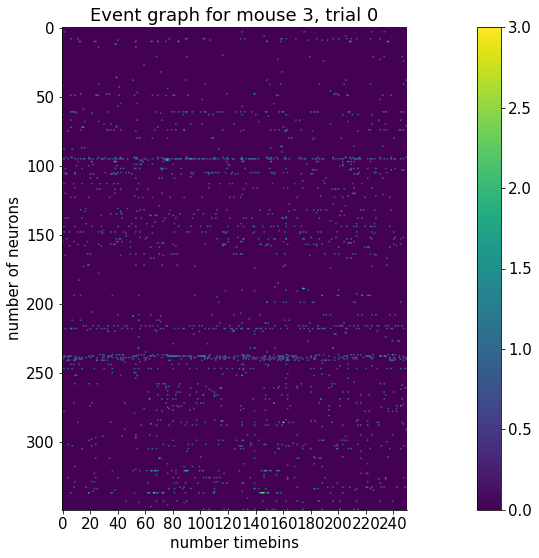

In [7]:
''' SPIKING MATRIX
- Number of neurons  (dat['spks'].shape[0]): 698 
- Number of trials   (dat['spks'].shape[1]): 340 
- Number of timebins (dat['spks'].shape[2]): 250 
'''
# Pick some mouse
mouse = 3

# Data from mouse
dat = alldat[mouse]

# Pick some brain regions
brain_areas = ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"]

# Number of timebins (same within animals)
num_timebins = dat['spks'].shape[2]

# Number of trials (variable within animals)
num_trials = dat['spks'].shape[1]

# Total number of neurons in those regions
num_neurons_per_area = [np.sum(dat['brain_area']==brain_area) for brain_area in brain_areas]
# Total number of neuron
num_neurons = np.sum(num_neurons_per_area)
# Indexes
idx_neurons = np.array([])
for brain_area in brain_areas:
  idx_neurons = np.append(idx_neurons, np.where(dat['brain_area']==brain_area)[0])

# Print info
print('Mouse %d'%mouse)
print(' - %d neurons'%num_neurons, num_neurons_per_area)
print(' - %d trials'%num_trials)

# Initialize spiking matrix (mice x neurons, timebins, trials)
spiking_matrix = np.zeros((num_neurons, num_timebins, num_trials))

# Fill matrix with spiking data
for trial in range(dat['spks'].shape[1]):
  spiking_matrix[:, :, trial] = dat['spks'][idx_neurons.astype(int), trial, :]
trial = 0
print('Spiking matrix: %a'%spiking_matrix[0])
print(spiking_matrix[0].shape)
plt.figure(figsize=[20,8])
plt.imshow(spiking_matrix[:,:,trial])
plt.colorbar()
x_ticks = np.arange(spiking_matrix[:,:,trial].shape[1])
plt.xticks(x_ticks[0::20])

plt.xlabel('number timebins')
plt.ylabel('number of neurons')
plt.title('Event graph for mouse 3, trial %d'%trial)

plt.savefig('Spiking matrix %d trial.jpg'%trial)
# TO-DO
# 1. Compute correlation matrix (within the time_intervals that you have selected)
# 2. Plot correlation matrix
# 2.5 You could use PCA instead of the correlation matrix if you want!
# 3. Apply hierarchical tree clustering to detect circuits

In [16]:
print(spiking_matrix.shape)

(350, 250, 249)


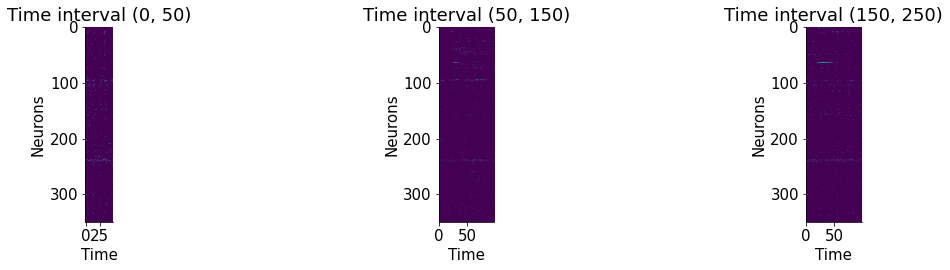

In [18]:
# Plot same spiking matrix divided into different part of the trial
time_intervals = [[0, 50], [50, 150], [150, 250]]

for isub in range(len(time_intervals)):
  plt.subplot(1,len(time_intervals),isub+1)
  plt.imshow(spiking_matrix[:,time_intervals[isub][0]:time_intervals[isub][1],trial_to_plot])
  plt.xlabel('Time')
  plt.ylabel('Neurons')
  plt.title('Time interval (%d, %d)'%tuple(time_intervals[isub]))

# plt.suptitle('Spiking matrix for neurons in %s'%brain_areas)

Text(0, 0.5, 'Number of spikes')

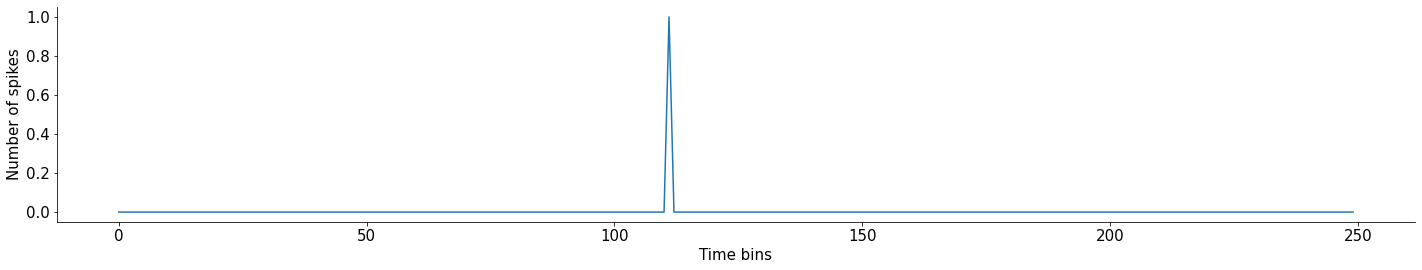

In [19]:
# Example of dat['spks']
neuron_to_plot = 50
trial_to_plot = -1

plt.figure()
plt.plot(dat['spks'][neuron_to_plot, trial_to_plot, :])
plt.xlabel('Time bins')
plt.ylabel('Number of spikes')

In [20]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region